# Research profitable calling plan

"Megaline", a state mobile operator, offers its clients two prepaid plans, *Surf* and *Ultimate*. The commercial department would like to know which of the plans is more profitable in order to adjust the advertising budget.  

We're going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 "Megaline" clients, specifically, who the clients are, where they are from, which plan they use, the number of calls made and SMS they sent in 2018. We have to analyse clients' behavior and work out the most profitable prepaid plan.

### Step 1. Open the data file and study the general information

In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy import stats as st

Read the files with data from "Megaline" and save it to the variables.

In [2]:
# read the real_estate_data.csv and use "sep" parameter
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_tariffs = pd.read_csv('megaline_tariffs.csv')
df_users = pd.read_csv('megaline_users.csv')

In [3]:
# df_calls.to_csv('megaline_calls.csv')
# df_internet.to_csv('megaline_internet.csv')
# df_messages.to_csv('megaline_messages.csv')
# df_tariffs.to_csv('megaline_tariffs.csv')
# df_users.to_csv('megaline_users.csv')

### Look at the general information of our datasets

**Look at the "df_calls"**

In [4]:
df_calls.info() # use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Print the first 5 rows

In [5]:
df_calls.head() # use head() method

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


- id — unique call identifier
- user_id — the identifier of the user making a call
- call_date — call date
- duration — call duration in minutes

Use describe() method for more information

Check the numeric values

In [6]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Check the quantitative values

In [7]:
df_calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1003_7,2018-12-27
freq,1,1091


### Conclusion

- We need to change object type for "call_date" to datetime object.
- We have calls with the duration of 0.0 minutes.  We leave them be. Probably this's rejected calls.
- We need to round "duration".

**Look at the "df_internet"**

In [8]:
df_internet.info()# use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Print the first 5 rows

In [9]:
df_internet.head() # use head() method

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


- id — unique session id
- user_id — user identifier
- session_date — web session date
- mb_used — the volume of web traffic spent during a session (in megabytes)

Use describe() method for more information

Check the numeric values

In [10]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Check the quantitative values

In [11]:
df_internet.describe(include='object')

,id,session_date
count,104825,104825
unique,104825,351
top,1003_7,2018-12-24
freq,1,851


### Conclusion

- We need to change object type for "session_date" to datetime object.
- We have sessions with the 0 MB. But I think that's ok. Probably users didn't use the internet. So they have 0 MB.
- We need to round "mb_used".

**Look at the "df_messages"**

In [12]:
df_messages.info()# use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Print the first 5 rows

In [13]:
df_messages.head() # use head() method

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- id — unique SMS identifier
- user_id — the identifier of the user sending an SMS
- message_date — SMS date

Use describe() method for more information

Check the numeric values

In [14]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Check the quantitative values

In [15]:
df_messages.describe(include='object')

,id,message_date
count,76051,76051
unique,76051,351
top,1111_285,2018-12-28
freq,1,702


### Conclusion

- We need to change object type for "message_date" to datetime object.

**Look at the "df_tariffs"**

Print the first rows

In [16]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- messages_included — monthly SMS within package limits
- mb_per_month_included — web traffic volume within package limits (in megabytes)
- minutes_included — monthly minutes within package limits
- rub_monthly_fee — monthly charge in rubles
- rub_per_gb — the price per extra gigabyte of web traffic after exceeding the package limits (1 GB = 1024 megabytes)
- rub_per_message — the price per SMS after exceeding the package limits
- rub_per_minute — the price per minute after exceeding the package limits (e.g., if the package included 100 minutes, the 101st minute will be charged)
- tariff_name — calling plan name

### Conclusion

- There're only tariffs description.

**Look at the "df_users"**

In [17]:
df_users.info()# use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Print the first 5 rows

In [18]:
df_users.head() # use head() method

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- city — user's city of residence
- reg_date — subscription date (dd, mm, yy)
- tarif — calling plan name
- churn_date — the date of use discontinue (if the value is missed, the calling plan was used at the moment of data extraction)

Use describe() method for more information

Check the numeric values

In [19]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Check the quantitative values

In [20]:
df_users.describe(include='object')

,first_name,last_name,city,reg_date,tariff,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Reese,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,surf,2018-12-18
freq,3,3,80,5,339,3


### Conclusion

- We need to change object type for "reg_date", "churn_date" to datetime object.
- We have NaN in the "churn_date". We can change nothing. The calling plan was used at the moment of data extraction, so there's no the date of use discontinue.

### Step 2. Data preprocessing

We should change the data types, check the data for duplicates and drop them

### Data type replacement

Replace a type for with "to_datetime" method.

- change object type for "call_date" to datetime object in "df_calls"
- change object type for "session_date" to datetime object in "df_internet".
- change object type for "message_date" to datetime object in "df_messages".
- change object type for "reg_date", "churn_date" to datetime object in "df_users".

In [21]:
def repl_type(df, col):
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='ignore') # replace type with "to_datetime"
    
repl_type(df_calls, 'call_date')
repl_type(df_internet,'session_date')
repl_type(df_messages, 'message_date')
repl_type(df_users, 'reg_date')
repl_type(df_users, 'churn_date')

Round the "duration", "mb_used" in the "df_calls", "df_internet"

In [22]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

In [23]:
# check the value types
df_calls.info()
print()
df_internet.info()
print()
df_messages.info()
print()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

<

### Processing duplicates

In [24]:
# check duplicates
print('df_calls duplicates =', df_calls.duplicated().sum())
print('df_internet duplicates =', df_internet.duplicated().sum())
print('df_messages duplicates =', df_messages.duplicated().sum())
print('df_users duplicates =', df_users.duplicated().sum())

df_calls duplicates = 0
df_internet duplicates = 0
df_messages duplicates = 0
df_users duplicates = 0


### Conclusion

We've replaced types and round values for all needed columns for convenience and clarity.

###  Make preparatory calculations

**The number of calls made and minutes spent per month for each user**

Add column 'call_month' in the "df_calls"

In [25]:
df_calls['month'] = df_calls['call_date'].dt.month # add column 'month'

Calculate the total calls and duration per month.

In [26]:
# use the pivot_table
# calls_num = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])

# use the groupby() method
calls_num = df_calls.groupby(['user_id', 'month']).duration.agg(['count', 'sum'])
calls_num.columns = ['calls_number', 'duration'] # rename columns
calls_num.head(10)

calls_number  duration
user_id month                        
1000    12               16     124.0
1001    8                27     182.0
        9                49     315.0
        10               65     393.0
        11               64     426.0
        12               56     412.0
1002    10               11      59.0
        11               55     386.0
        12               47     384.0
1003    12              149    1104.0

**The number of SMS sent per month for each user**

Add column 'message_month' in the "df_messages"

In [27]:
df_messages['month'] = df_messages['message_date'].dt.month # add column 'month'

Calculate the total SMS per month.

In [28]:
# use the pivot_table
# messages_num = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

# use the groupby() method
messages_num = df_messages.groupby(['user_id', 'month'])[['id']].count()
messages_num.columns = ['messages_number'] # rename columns
messages_num.head(10)

messages_number
user_id month                 
1000    12                  11
1001    8                   30
        9                   44
        10                  53
        11                  36
        12                  44
1002    10                  15
        11                  32
        12                  41
1003    12                  50

**The volume of web traffic per month for each user**

Add column 'session_month' in the "df_internet"

In [29]:
df_internet['month'] = df_internet['session_date'].dt.month # add column 'month'

Calculate the total MB per month.

In [30]:
# use the pivot_table
# internet_vol = df_internet.pivot_table(index=['user_id', 'month'], values='id', aggfunc='sum')

# use the groupby() method
internet_vol = df_internet.groupby(['user_id', 'month'])[['mb_used']].sum()
internet_vol.columns = ['mb_used_sum'] # rename columns
internet_vol.head(10)

mb_used_sum
user_id month             
1000    12          1903.0
1001    8           6929.0
        9          13333.0
        10         22356.0
        11         18524.0
        12         19398.0
1002    10          6559.0
        11         19364.0
        12         14416.0
1003    12         27069.0

**The monthly profit from each of the users**

In [31]:
# choose "user_id" and "tariff" column in the "df_users"
сalling_plan = df_users[['user_id', 'tariff']]
сalling_plan.head()

,user_id,tariff
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [32]:
# concat "df_users" and "calls_num", "messages_num", "internet_vol" with "reset_index()" to save "month"
concat_table = pd.concat([calls_num, messages_num, internet_vol], axis=1).reset_index()
# merge "concat_table" with "сalling_plan" for adding the "tariff" column
profit_table = concat_table.merge(сalling_plan, on='user_id')
profit_table.head()

,user_id,month,calls_number,duration,messages_number,mb_used_sum,tariff
0,1000,12,16.0,124.0,11.0,1903.0,ultimate
1,1001,8,27.0,182.0,30.0,6929.0,surf
2,1001,9,49.0,315.0,44.0,13333.0,surf
3,1001,10,65.0,393.0,53.0,22356.0,surf
4,1001,11,64.0,426.0,36.0,18524.0,surf


In [33]:
# check duplicates
print('profit_table duplicates =', profit_table.duplicated().sum())

profit_table duplicates = 0


In [34]:
# check the NaN values
profit_table.isnull().sum()

user_id              0
month                0
calls_number        35
duration            35
messages_number    487
mb_used_sum         16
tariff               0
dtype: int64

Replace NaN with "0", the users didn't use the phone for calls, messages, internet these days.

In [35]:
# replace NaN with "0"
profit_table.fillna(0, inplace=True)

In [36]:
# check the NaN values
profit_table.isnull().sum()

user_id            0
month              0
calls_number       0
duration           0
messages_number    0
mb_used_sum        0
tariff             0
dtype: int64

There's no NaN values now.

Count exceeding the package limits for calls, SMS, internet. And total profit.

In [37]:
# create the func to count SMS exceeding the package limits
def profit_calls(row):
    tariff = row['tariff']
    duration = row['duration']
    if tariff == 'surf' and duration > 500:
        return (duration - 500) * 0.03
    if tariff == 'ultimate' and duration > 3000:
        return (duration - 3000) * 0.01
    else:
        return 0
    return row

# create the func to count calls exceeding the package limits
def profit_messages(row):
    tariff = row['tariff']
    messages_number = row['messages_number']
    if tariff == 'surf' and messages_number > 50:
        return (messages_number - 50) * 0.03
    if tariff == 'ultimate' and messages_number > 1000:
        return (duration - 1000) * 0.01
    else:
        return 0
    return row

# create the func to count MB exceeding the package limits
def profit_internet(row):
    tariff = row['tariff']
    mb_used_sum = row['mb_used_sum']
    if tariff == 'surf' and mb_used_sum > 15360:
        return m.ceil(mb_used_sum / 1024) * 10
    if tariff == 'ultimate' and mb_used_sum > 30720:
        return m.ceil(mb_used_sum / 1024) * 7
    else:
        return 0
    return row

# create the func to count total profit
def profit_total(row):
    tariff = row['tariff']
    calls_profit = row['calls_profit']
    messages_profit = row['messages_profit']
    internet_profit = row['internet_profit']
    if tariff == 'surf':
        return calls_profit + messages_profit + internet_profit + 20
    else:
        return calls_profit + messages_profit + internet_profit + 70
    return row


# use apply() method to add 'calls_profit' column
profit_table['calls_profit'] = profit_table.apply(profit_calls, axis=1)

# use apply() method to add 'messages_profit' column
profit_table['messages_profit'] = profit_table.apply(profit_messages, axis=1)

# use apply() method to add 'calls_profit' column
profit_table['internet_profit'] = profit_table.apply(profit_internet, axis=1)

# use apply() method to add 'total_profit' column
profit_table['total_profit'] = profit_table.apply(profit_total, axis=1)

In [38]:
profit_table.head()

,user_id,month,calls_number,duration,messages_number,mb_used_sum,tariff,calls_profit,messages_profit,internet_profit,total_profit
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,0.0,0.00,0,70.00
1,1001,8,27.0,182.0,30.0,6929.0,surf,0.0,0.00,0,20.00
2,1001,9,49.0,315.0,44.0,13333.0,surf,0.0,0.00,0,20.00
3,1001,10,65.0,393.0,53.0,22356.0,surf,0.0,0.09,220,240.09
4,1001,11,64.0,426.0,36.0,18524.0,surf,0.0,0.00,190,210.00


Calculate percentage exceeding the package limits for "calls_profit", "messages_profit", "internet_profit".

In [39]:
for col in ('calls_profit', 'messages_profit', 'internet_profit'):
    print('Exceeding the package limits for "{}": {:.2%}'.format(col, (profit_table.shape[0] - profit_table[profit_table[col] == 0][col].count()) / profit_table.shape[0]))

Exceeding the package limits for "calls_profit": 24.68%
Exceeding the package limits for "messages_profit": 14.83%
Exceeding the package limits for "internet_profit": 41.52%


### Conclusion

- Not all users have 12 active months. Probably they didn't use this SIM card, service (calls, SMS, internet) or calling plan in inactive months.
- Users most often exceed the limits of packages for the service "internet". This is logical because people most often use the internet for calls and messages nowadays.

### Step 3. Analyse the data

We need to describe the clients' behavior. For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month. Calculate the mean, dispersion and standard deviation. Plot histograms. Describe the distributions. 

**Add the "tariff" column to the "calls_num", "messages_num", "internet_vol". And create 2 dataframes for "surf" and "ultimate" plans.**

In [40]:
# merge "calls_num" with "сalling_plan" for adding the "tariff" column
calls_num_tariffs = calls_num.reset_index().merge(сalling_plan, on='user_id')

# create 2 dataframes for "surf" and "ultimate" plans
calls_num_surf = calls_num_tariffs[calls_num_tariffs['tariff'] == 'surf']
calls_num_ultimate = calls_num_tariffs[calls_num_tariffs['tariff'] == 'ultimate']

In [41]:
# merge "messages_num" with "сalling_plan" for adding the "tariff" column
messages_num_tariffs = messages_num.reset_index().merge(сalling_plan, on='user_id')

# create 2 dataframes for "surf" and "ultimate" plans
messages_num_surf = messages_num_tariffs[messages_num_tariffs['tariff'] == 'surf']
messages_num_ultimate = messages_num_tariffs[messages_num_tariffs['tariff'] == 'ultimate']

In [42]:
# merge "internet_vol" with "сalling_plan" for adding the "tariff" column
internet_vol_tariffs = internet_vol.reset_index().merge(сalling_plan, on='user_id')

# create 2 dataframes for "surf" and "ultimate" plans
internet_vol_surf = internet_vol_tariffs[internet_vol_tariffs['tariff'] == 'surf']
internet_vol_ultimate = internet_vol_tariffs[internet_vol_tariffs['tariff'] == 'ultimate']

**Plot histograms and use describe() method.**

*Plot histograms for "calls_num_surf" and "calls_num_ultimate" for "calls_number" column*

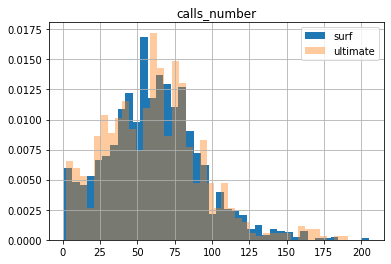

In [43]:
calls_num_surf['calls_number'].hist(density=True, bins=40) # plot the histogram for "calls_num_surf"
calls_num_ultimate['calls_number'].hist(density=True, bins=40, alpha=0.4) # plot the histogram for "calls_num_ultimate"
plt.title("calls_number")
labels= ["surf", "ultimate"]
plt.legend(labels)
plt.show()

In [44]:
calls_num_surf['calls_number'].describe() # use describe method() for "calls_num_surf"

count    1545.000000
mean       60.895793
std        31.268044
min         1.000000
25%        40.000000
50%        60.000000
75%        80.000000
max       205.000000
Name: calls_number, dtype: float64

In [45]:
calls_num_ultimate['calls_number'].describe() # use describe method() for "calls_num_ultimate"

count    713.000000
mean      61.221599
std       32.855296
min        2.000000
25%       37.000000
50%       61.000000
75%       80.000000
max      191.000000
Name: calls_number, dtype: float64

As we see a mean, std, quartiles are not much different. And the histograms have the form of a normal distribution.

*Plot histograms for "calls_num_surf" and "calls_num_ultimate" for "duration" column*

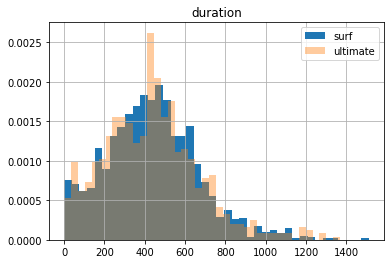

In [46]:
calls_num_surf['duration'].hist(density=True, bins=40) # plot the histogram for "calls_num_surf"
calls_num_ultimate['duration'].hist(density=True, bins=40, alpha=0.4) # plot the histogram for "calls_num_ultimate"
plt.title("duration")
labels= ["surf", "ultimate"]
plt.legend(labels)
plt.show()

In [47]:
calls_num_surf['duration'].describe() # use describe method() for "calls_num_surf"

count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: duration, dtype: float64

In [48]:
calls_num_ultimate['duration'].describe() # use describe method() for "calls_num_ultimate"

count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: duration, dtype: float64

As we see a mean, std, quartiles are not much different. And the histograms have the form of a normal distribution.

*Plot histograms for "messages_num_surf" and "messages_num_ultimate" for "messages_number" column*

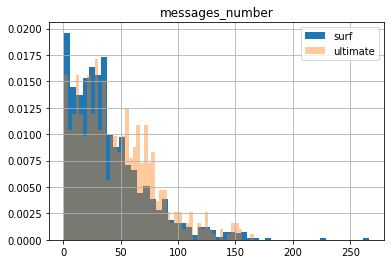

In [49]:
messages_num_surf['messages_number'].hist(density=True, bins=50) # plot the histogram for "messages_num_surf"
messages_num_ultimate['messages_number'].hist(density=True, bins=50, alpha=0.4) # plot the histogram for "messages_num_ultimate"
plt.title("messages_number")
labels= ["surf", "ultimate"]
plt.legend(labels)
plt.show()

In [50]:
messages_num_surf['messages_number'].describe() # use describe method() for "messages_num_surf"

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: messages_number, dtype: float64

In [51]:
messages_num_ultimate['messages_number'].describe() # use describe method() for "messages_num_ultimate"

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: messages_number, dtype: float64

As we see a mean, std, quartiles are not much different. And the histograms have the form of a  Poisson distribution. The distribution is skewed to the right.

*Plot histograms for "internet_vol_surf" and "internet_vol_ultimate" for "mb_used_sum" column*

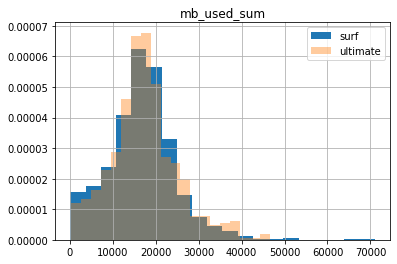

In [52]:
internet_vol_surf['mb_used_sum'].hist(density=True, bins=20) # plot the histogram for "internet_vol_surf"
internet_vol_ultimate['mb_used_sum'].hist(density=True, bins=20, alpha=0.4) # plot the histogram for "internet_vol_ultimate"
plt.title("mb_used_sum")
labels= ["surf", "ultimate"]
plt.legend(labels)
plt.show()

In [53]:
internet_vol_surf['mb_used_sum'].describe() # use describe method() for "internet_vol_surf"

count     1558.000000
mean     16737.361361
std       7892.426749
min         93.000000
25%      12205.250000
50%      16945.500000
75%      21066.750000
max      70988.000000
Name: mb_used_sum, dtype: float64

In [54]:
internet_vol_ultimate['mb_used_sum'].describe() # use describe method() for "internet_vol_ultimate"

count      719.000000
mean     17258.613352
std       7838.192189
min        235.000000
25%      12685.500000
50%      16887.000000
75%      21054.000000
max      46634.000000
Name: mb_used_sum, dtype: float64

As we see a mean, std, quartiles are not much different. And the histograms have the form of a normal distribution.

### Step 4. Test the hypotheses

*1st hypothesis*:  
- *H0*: the average profit of Ultimate equals the average profit of Surf.  
- *H1*: the average profit from the users of Ultimate and Surf calling plans is different.  

*2nd hypothesis*:  
- *H0*: the average profit in NY-NJ area equals the average profit in other regions.  
- *H1*: the average profit from the users in NY-NJ area is different from that of the users from other regions.

Threshold p-value = 0.05.

**Look at the 1st hypothesis**

In [55]:
# create 2 dataframes for "surf" and "ultimate" plans
profit_table_surf = profit_table[profit_table['tariff'] == 'surf']['total_profit']
profit_table_ultimate = profit_table[profit_table['tariff'] == 'ultimate']['total_profit']

In [56]:
# calculate mean profit for "surf" and "ultimate" plans
print(profit_table_surf.mean())
print(profit_table_ultimate.mean())

147.66762873490146
84.29166666666667


In [57]:
alpha = .05 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        profit_table_surf, 
        profit_table_ultimate)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  7.264833337309969e-42
We reject the null hypothesis


That means the average profit from the users of Ultimate and Surf calling plans is different. "Surf" is more prifitable tariff.

**Look at the 2nd hypothesis**

In [58]:
# add "group_city" column to the "df_users"
def city_group(text):
    if 'NY' in text or 'NJ' in text:
        return 'NY-NJ'
    else:
        return 'other'
    
df_users['group_city'] = df_users['city'].apply(city_group) # use apply() method to process column
df_users['group_city'].value_counts() # check the values

other    397
NY-NJ    103
Name: group_city, dtype: int64

In [59]:
# choose "user_id" and "group_city" columns in the "df_users"
сities = df_users[['user_id', 'group_city']]
сities.head()

,user_id,group_city
0,1000,other
1,1001,other
2,1002,other
3,1003,other
4,1004,other


In [60]:
profit_table_cities = profit_table.merge(сities, on='user_id')
profit_table_cities.head()

,user_id,month,calls_number,duration,messages_number,mb_used_sum,tariff,calls_profit,messages_profit,internet_profit,total_profit,group_city
0,1000,12,16.0,124.0,11.0,1903.0,ultimate,0.0,0.00,0,70.00,other
1,1001,8,27.0,182.0,30.0,6929.0,surf,0.0,0.00,0,20.00,other
2,1001,9,49.0,315.0,44.0,13333.0,surf,0.0,0.00,0,20.00,other
3,1001,10,65.0,393.0,53.0,22356.0,surf,0.0,0.09,220,240.09,other
4,1001,11,64.0,426.0,36.0,18524.0,surf,0.0,0.00,190,210.00,other


In [61]:
profit_table_cities.group_city.value_counts()  # check the values

other    1805
NY-NJ     488
Name: group_city, dtype: int64

In [62]:
# create 2 dataframes for "NY-NJ" and "other" regions
profit_table_ny_nj = profit_table_cities[profit_table_cities['group_city'] == 'NY-NJ']['total_profit']
profit_table_other = profit_table_cities[profit_table_cities['group_city'] == 'other']['total_profit']

In [63]:
alpha = .05 # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        profit_table_ny_nj, 
        profit_table_other)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.09166319293897364
We can't reject the null hypothesis


That means the average profit in NY-NJ area equals the average profit in other regions.
There's a 9% probability of randomly getting a difference that size or larger. This probability is clearly too high to conclude that there's a significant difference between the average amounts spent.

### Step 5. Overall conclusion

*The main task:*

We have to analyse clients' behavior and work out the most profitable prepaid plan. 

*Conclusion:*  
We reject the null hypothesis. That means the average profit from the users of Ultimate and Surf calling plans is different. "Surf" is more prifitable tariff. It has a larger mean.

Also the average profit in NY-NJ area equals the average profit in other regions.